In [1]:
# 简单爬虫的项目实战
## 爬虫网页地址: http://data.10jqka.com.cn/financial/yjyg/

In [20]:
import requests
import re
requests.get('https://www.baidu.com')

<Response [200]>

## 状态码 
- 20*: 证明请求成功
- 30*: 请求跳转 
- 40*: 客户端错误
- 50*: 服务端错误

In [21]:
result = requests.get('https://www.baidu.com')
result.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

In [22]:
result = requests.get('http://data.10jqka.com.cn/financial/yjyg/')
result.text

''

In [23]:
# 获取所有的索引
index = re.findall('<td>(.*)</td>',result.text)
print(index)
# 获取其中的股票代码
# class="stockCode">300888</a>
stock_code = re.findall('class="stockCode">(.*)</a>',result.text)
print(stock_code)
# 获取股票名称
# class="J_showCanvas">中泰证券</a>
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result.text)
print(stock_name)
# 获取业绩数据
# <span>业绩预增</span>
performance = re.findall('<span>(.*)</span>',result.text)
print(performance)
# 获取摘要
# target="_blank">净利润165975.04万元至179806.29万元,增长幅度为20%至30%</a>
summary = re.findall('target="_blank">(.*)</a>',result.text)
print(summary)

[]
[]
[]
[]
[]


### 现在有一些问题：
- 获取到的数据可能存在一些不需要的信息
- 该网址只能抓取第一页，翻页后的网址也是同一个

## 第二种抓取方式
- 右键 选择 检查 点击网络（network）获取到新的url

<b>为了获取多页数据，我们来观察翻页后url的变化</b>
- http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/
- http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/1/ajax/1/free/1/
- http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/2/ajax/1/free/1/
- http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/3/ajax/1/free/1/

In [24]:
result = requests.get('http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/1/ajax/1/free/1/')
result

<Response [200]>

In [25]:
result.text

''

In [26]:
# 为什么会空？
# 修改 headers
# 获取一页的内容
headers = {
    "Accept": "text/html, */*; q=0.01",
    #"Accept-Encoding": "gzip, deflate",
    #"Accept-Language": "zh-CN,zh;q=0.9",
    #"Connection": "keep-alive",
    "Cookie": "Cookie: Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1627187657; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1627187657; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1627187657; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1627187727; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1627187727; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1627187727; v=A656xCbfQmVT27aB4ugcnQGW-Q9zr3KphHMmjdh3GrFsu0C5QD_CuVQDdpGr",
    #"hexin-v": "A2pAFtsQ_qOiLXJPkyy4ElDMvdsP2-414F9i2fQjFr1IJwRN3Gs-RbDvsuvH",
    #"Host": "data.10jqka.com.cn",
    #"Referer": "http://data.10jqka.com.cn/financial/yjyg/",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36",
    #"X-Requested-With": "XMLHttpRequest",
}
url = 'http://data.10jqka.com.cn/ajax/yjyg/date/2021-06-30/board/ALL/field/enddate/order/desc/ajax/1/free/1/'

result = requests.get(url,headers=headers)
result

<Response [200]>

In [27]:
result.text

'     <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期净

In [28]:
# 获取所有的索引
index = re.findall('<td>(.*)</td>',result.text)
print(index)
# 获取其中的股票代码
# class="stockCode">300888</a>
stock_code = re.findall('class="stockCode">(.*)</a>',result.text)
print(stock_code)
# 获取股票名称
# class="J_showCanvas">中泰证券</a>
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result.text)
print(stock_name)
# 获取业绩数据
# <span>业绩预增</span>
performance = re.findall('<span>(.*)</span>',result.text)
print(performance)
# 获取摘要
# target="_blank">净利润165975.04万元至179806.29万元,增长幅度为20%至30%</a>
summary = re.findall('target="_blank">(.*)</a>',result.text)
print(summary)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']
['300709', '600261', '600521', '600561', '600732', '601800', '603131', '605296', '300005', '300223', '300867', '300888', '300964', '301043', '600129', '600558', '601258', '603200', '688099', '001211', '300527', '300546', '300631', '301042', '600505', '600707', '600918', '603015', '603926', '300814', '600026', '600323', '600368', '600548', '600578', '601992', '603330', '603377', '605090', '605589', '688108', '688156', '000950', '002726', '300124', '300354', '300762', '600628', '600858', '601177']
['精研科技', '阳光照明', '华海药业', '江西长运', '爱旭股份', '中国交建', '上海沪工', '神农集团', '探路者', '北京君正', '圣元环保', '稳健医疗', '本川智能', '绿岛风', '太极集团', '大西洋', '庞大集团', '上海洗霸', '晶晨股份', '双枪科技', '中船应急', '雄帝科技', '久吾高科', '安联锐视', '西昌电力', '彩虹股份', '

In [29]:
# 获取多页页的内容
headers = {
    "Accept": "text/html, */*; q=0.01",
    "Cookie": "Cookie: Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1627187657; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1627187657; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1627187657; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1627187727; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1627187727; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1627187727; v=A656xCbfQmVT27aB4ugcnQGW-Q9zr3KphHMmjdh3GrFsu0C5QD_CuVQDdpGr",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36",
}
url = 'http://data.10jqka.com.cn/ajax/yjyg/date/2021-06-30/board/ALL/field/enddate/order/desc/page/{}/ajax/1/free/1/'
result = ""
for i in range(1,6):
    result += requests.get(url.format(i),headers=headers).text
result

'     <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期净

In [30]:
# 获取所有的索引
index = re.findall('<td>(.*)</td>',result)
print(index)
# 获取其中的股票代码
# class="stockCode">300888</a>
stock_code = re.findall('class="stockCode">(.*)</a>',result)
print(stock_code)
# 获取股票名称
# class="J_showCanvas">中泰证券</a>
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result)
print(stock_name)
# 获取业绩数据
# <span>业绩预增</span>
performance = re.findall('<span>(.*)</span>',result)
print(performance)
# 获取摘要
# target="_blank">净利润165975.04万元至179806.29万元,增长幅度为20%至30%</a>
summary = re.findall('target="_blank">(.*)</a>',result)
print(summary)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
['300709', '600261', '600521', '600561', '600732', '601800', '603131', '605296', '300005', '300223', '300867', '300888', '300964', '301043', '600129', '600558', '601258', '603200', '688099', '001211', '300527', '300546', '300631', '301042', '600505', '600707', '600918', '603015', '603926', '300814', '600026', '600323', '600368', '600548', '600578', '601992', '603330', '603377', '605090', '605589', '68810

In [37]:
# 把以上获取到的数据变成DataFrame数据类型
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame({
    "stock_code":stock_code,
    "stock_name":stock_name,
    "performance":performance,
    "summary":summary
}, index=index)
data.head(15)

,stock_code,stock_name,performance,summary
1,300709,精研科技,业绩大幅下降,"净利润1400.00万元至1900.00万元,下降幅度为61.55%至47.81%"
2,600261,阳光照明,业绩预增,"净利润27805万元至30585万元,增长幅度为0%至10%"
3,600521,华海药业,业绩预降,"净利润50000万元至55000万元,下降幅度为14%至5%"
4,600561,江西长运,预计扭亏,净利润900万元至1200万元
5,600732,爱旭股份,业绩预亏,净利润-3000万元至-2000万元
6,601800,中国交建,业绩大幅上升,"净利润854100万元至973500万元,增长幅度为109.70%至139.01%"
7,603131,上海沪工,业绩大幅上升,增长幅度为50%至70%
8,605296,神农集团,业绩预降,"净利润35300.00万元至37400.00万元,下降幅度为43.93%至40.6%"
9,300005,探路者,预计扭亏,净利润1200万元至1500万元
10,300223,北京君正,业绩大幅上升,"净利润31335.24万元至40293.99万元,增长幅度为2631.64%至3412.62%"


In [46]:
data['start_profit'] = data['summary'].str.extract('净利润(-?\d*\.?\d*)万元') # ?是指0或者1次
data['end_profit'] = data['summary'].str.extract('至(-{0,1}\d{0,10}\.{0,1}\d{0,10})万元') # 另一种方法
data.head(15)

,stock_code,stock_name,performance,summary,start_profit,end_profit
1,300709,精研科技,业绩大幅下降,"净利润1400.00万元至1900.00万元,下降幅度为61.55%至47.81%",1400.00,1900.00
2,600261,阳光照明,业绩预增,"净利润27805万元至30585万元,增长幅度为0%至10%",27805,30585
3,600521,华海药业,业绩预降,"净利润50000万元至55000万元,下降幅度为14%至5%",50000,55000
4,600561,江西长运,预计扭亏,净利润900万元至1200万元,900,1200
5,600732,爱旭股份,业绩预亏,净利润-3000万元至-2000万元,-3000,-2000
6,601800,中国交建,业绩大幅上升,"净利润854100万元至973500万元,增长幅度为109.70%至139.01%",854100,973500
7,603131,上海沪工,业绩大幅上升,增长幅度为50%至70%,NaN,NaN
8,605296,神农集团,业绩预降,"净利润35300.00万元至37400.00万元,下降幅度为43.93%至40.6%",35300.00,37400.00
9,300005,探路者,预计扭亏,净利润1200万元至1500万元,1200,1500
10,300223,北京君正,业绩大幅上升,"净利润31335.24万元至40293.99万元,增长幅度为2631.64%至3412.62%",31335.24,40293.99


In [47]:
data['performance'].unique()

array(['业绩大幅下降', '业绩预增', '业绩预降', '预计扭亏', '业绩预亏', '业绩大幅上升', '预计增亏', '预计减亏'],
      dtype=object)

In [50]:
# 设置一个亏损的字段，亏损的字段值为-1，盈利的字段值为1
# 盈利：  '业绩预增', '业绩大幅上升', '预计扭亏'
# 亏损： '预计减亏', '业绩大幅下降', '业绩预亏', '预计增亏', '业绩预降','预计续亏'

def if_profit(x):
    if x in ['业绩预增', '业绩大幅上升', '预计扭亏']:
        return 1
    if x in ['预计减亏', '业绩大幅下降', '业绩预亏', '预计增亏', '业绩预降','预计续亏']:
        return -1
    return 0

data['is_profit'] = data.apply(lambda x:if_profit(x['performance']),axis = 1)
data

,stock_code,stock_name,performance,summary,start_profit,end_profit,is_profit
1,300709,精研科技,业绩大幅下降,"净利润1400.00万元至1900.00万元,下降幅度为61.55%至47.81%",1400.00,1900.00,-1
2,600261,阳光照明,业绩预增,"净利润27805万元至30585万元,增长幅度为0%至10%",27805,30585,1
3,600521,华海药业,业绩预降,"净利润50000万元至55000万元,下降幅度为14%至5%",50000,55000,-1
4,600561,江西长运,预计扭亏,净利润900万元至1200万元,900,1200,1
5,600732,爱旭股份,业绩预亏,净利润-3000万元至-2000万元,-3000,-2000,-1
...,...,...,...,...,...,...,...
96,300994,久祺股份,业绩预增,"净利润6409.46万元至7432.47万元,增长幅度为6.51%至23.51%",6409.46,7432.47,1
97,301041,金百泽,业绩预增,"净利润2909万元至3132万元,增长幅度为32.99%至43.19%",2909,3132,1
98,600688,上海石化,预计扭亏,净利润111000万元至136000万元,111000,136000,1
99,600755,厦门国贸,业绩大幅上升,"净利润226500万元至247700万元,增长幅度为60%至75%",226500,247700,1


In [51]:
import numpy as np
profit = np.sum(data['is_profit'] ==1)
profit

73

In [52]:
deficit = np.sum(data['is_profit'] ==-1)
deficit

27

Text(0.5, 1.0, '上市公司盈利亏损占比')

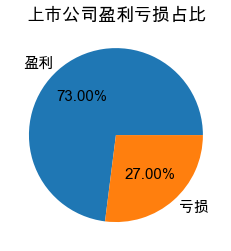

In [55]:
font = {'family':'Arial Unicode MS','size':15}
plt.rc('font',**font)
plt.pie([profit,deficit],labels = ['盈利','亏损'],autopct= "%.2f%%")
plt.title("上市公司盈利亏损占比")

# 结束